# Titanic Survival Predictions
This assignment will guide you with a introductory Machine Learning assignment where you will learn how to clean
data and pre-process. Furthermore, you will also learn how to use this data to predict the accuracy using different 
algorithms/models. 

The sinking of the Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew. While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this assignment, we ask you to build a predictive model using different algorithms. 

### Content:
1. Import Necessary Libraries
2. Read In and view the Data
3. Data Visualization
4. Cleaning Data
5. Choosing the Best Model

From part 1-3, you can just run the codes and try to understand the dataset and it's characteristics.
You are expected to code for part 4 and 5. 

The learning goals are:
- dropping a feature from the data set using Python
- imputing missing values from a feature 
- transforming categorial values to numerical values
- applying an algorithm 

Typical steps for data science in Machine Learning are:
- Gathering data: a data set is is created or retrieved to use for prediction.

- Clean , prepare and manipulate data: to achieve homogeneity in the data sets, sometimes the data contains missing values which needs to be handled carefully. Data cleaning is the process of preparing data for analysis by weeding out information that is considered irrelevant. 
- Train the model: A training model is a dataset that is used to train an ML algorithm. It consists of the sample output data and the corresponding sets of input data that have an influence on the output. The training model is used to run the input data through the algorithm to correlate the processed output against the sample output.
- Evaluate the model: Model evaluation is the process of using different evaluation metrics to understand a machine learning model's performance, as well as its strengths and weaknesses.

## 1) Import Necessary Libraries
First off, we need to import several Python libraries such as numpy, pandas, matplotlib and seaborn.

In [2]:
#NumPy is a Python library used for working with arrays. It also has functions for working in domain of linear algebra, fourier transform, and matrices. 
#pandas is a software library written for the Python programming language for data manipulation and analysis
#Matplotlib is a cross-platform, data visualization and graphical plotting library for Python 
#Seaborn is a library that uses Matplotlib underneath to plot graphs.

#data analysis libraries 
import numpy as np 
import pandas as pd 

#visualization libraries
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

## 2A) Read the Data 
It's time to read in our training and testing data using `pd.read_csv`, and take a first look at the training data. The datasets are CSV files. A CSV (comma-separated values) file is a text file that has a specific format which allows data to be saved in a table structured format.

In [6]:
#import train and test CSV files
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")



## 2B) View the data

In [5]:
#take a look at the training data
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C



Let's see how our test data looks!

In [7]:
test.describe(include="all")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Cavendish, Mrs. Tyrell William (Julia Florence...",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


* We have a total of 418 passengers.
* Around 20.5% of the Age feature is missing, so we will need to fill in the missing values.


We're going to consider the features in the dataset and how complete they are. 

In [3]:
#list of the features within the dataset
print(train.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


#### Explanation of dataset
* **PassengerID -** A column added by Kaggle to identify each row and make submissions easier
* **Survived -** Whether the passenger survived or not and the value we are predicting (0=No, 1=Yes)
* **Pclass -** The class of the ticket the passenger purchased (1=1st, 2=2nd, 3=3rd)
* **Sex -** The passenger's sex
* **Age -** The passenger's age in years
* **SibSp -** The number of siblings or spouses the passenger had aboard the Titanic
* **Parch -** The number of parents or children the passenger had aboard the Titanic
* **Ticket -** The passenger's ticket number
* **Fare -** The fare the passenger paid
* **Cabin -** The passenger's cabin number
* **Embarked -** The port where the passenger embarked (C=Cherbourg, Q=Queenstown, S=Southampton)  

#### Features types
* **Numerical Features:** Age (Continuous), Fare (Continuous), SibSp (Discrete), Parch (Discrete)
* **Categorical Features:** Survived, Sex, Embarked, Pclass
* **Alphanumeric Features:** Ticket, Cabin

#### Some Observations:
* There are a total of 891 passengers in our training set.
* The Age feature is missing approximately 19.8% of its values. One can think that the Age feature is pretty important to survival, so we should probably attempt to fill these gaps. 
* The Cabin feature is missing approximately 77.1% of its values. Since so much of the feature is missing, it would be hard to fill in the missing values. We will  drop these values from our dataset.
* The Embarked feature is missing 0.22% of its values, which should be relatively harmless.

In [4]:
#check for any other unusable values
print(pd.isnull(train).sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


## 3) Data Visualization
It's time to visualize our data so we can understand our data better! 

### Sex Feature

Percentage of females who survived: 74.20382165605095
Percentage of males who survived: 18.890814558058924


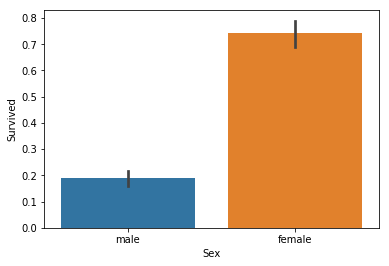

In [5]:
#bar plot of survival by sex

sns.barplot(x="Sex", y="Survived", data=train)

#percentages of females vs. males that survive
print("Percentage of females who survived:", train["Survived"][train["Sex"] == 'female'].value_counts(normalize = True)[1]*100)

print("Percentage of males who survived:", train["Survived"][train["Sex"] == 'male'].value_counts(normalize = True)[1]*100)

Females have a much higher chance of survival than males. Therefore, the Sex feature is essential in our predictions.

### Pclass Feature

Percentage of Pclass = 1 who survived: 62.96296296296296
Percentage of Pclass = 2 who survived: 47.28260869565217
Percentage of Pclass = 3 who survived: 24.236252545824847


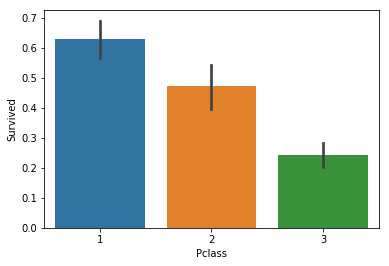

In [6]:
#bar plot of survival by Pclass using sns.barplot

sns.barplot(x="Pclass", y="Survived", data=train)

#percentage of people by Pclass that survived
print("Percentage of Pclass = 1 who survived:", train["Survived"][train["Pclass"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 2 who survived:", train["Survived"][train["Pclass"] == 2].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 3 who survived:", train["Survived"][train["Pclass"] == 3].value_counts(normalize = True)[1]*100)

People with higher socio-economic class had a higher rate of survival. (62.9% vs. 47.3% vs. 24.2%)

### SibSp Feature

Percentage of SibSp = 0 who survived: 34.53947368421053
Percentage of SibSp = 1 who survived: 53.588516746411486
Percentage of SibSp = 2 who survived: 46.42857142857143


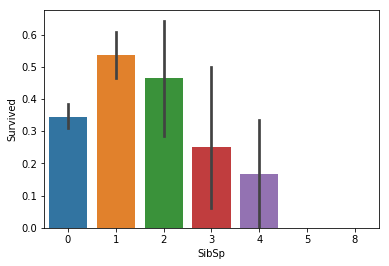

In [7]:
#bar plot for SibSp vs. survival
sns.barplot(x="SibSp", y="Survived", data=train)

print("Percentage of SibSp = 0 who survived:", train["Survived"][train["SibSp"] == 0].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 1 who survived:", train["Survived"][train["SibSp"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 2 who survived:", train["Survived"][train["SibSp"] == 2].value_counts(normalize = True)[1]*100)

In general, it's clear that people with 1 or 2 siblings had the highest chance of surviving.

### Parch Feature

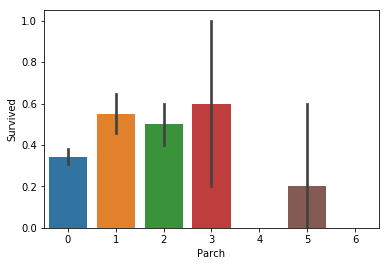

In [8]:
#bar plot for Parch vs. survival
sns.barplot(x="Parch", y="Survived", data=train)
plt.show()

People with less than four parents or children aboard are more likely to survive than those with four or more. Again, people traveling alone are less likely to survive than those with 1-3 parents or children.

### Age Feature

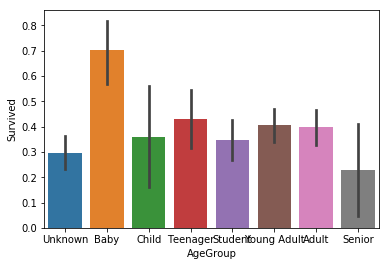

In [9]:
#the ages into logical categories
train["Age"] = train["Age"].fillna(-0.5)
test["Age"] = test["Age"].fillna(-0.5)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
train['AgeGroup'] = pd.cut(train["Age"], bins, labels = labels)
test['AgeGroup'] = pd.cut(test["Age"], bins, labels = labels)

#bar plot of Age vs. survival
sns.barplot(x="AgeGroup", y="Survived", data=train)
plt.show()

Babies are more likely to survive than any other age group. 

## 4) Cleaning Data
Time to clean our data to account for missing values and unnecessary information!

In important part of cleaning the data consist of:
1) dealing with data that is not usefull for analysis

2) dealing with data that is missing.

When dealing with data that is missing, data scientists can use two primary methods to solve the error: imputation or the removal of data. The imputation method develops reasonable guesses for missing data. It's most useful when the percentage of missing data is low. If the percentage of missing data is (too) high, the prediction of the missing values becomes less reliable and is removed. 

### Cabin Feature

In [11]:
#we will dropp the Cabin feature since not a lot more useful information can be extracted from it and is alphanumeric.
train = train.drop(['Cabin'], axis = 1)
test = test.drop(['Cabin'], axis = 1)

### Ticket Feature

In [12]:
#we can also drop the Ticket feature since it's unlikely to yield any useful information and is alphanumeric for both train and test

### YOUR CODE BEGINS HERE

train = train.drop(['Ticket'], axis = 1)
test = test.drop(['Ticket'], axis = 1)

### YOUR CODE ENDS HERE

### Embarked Feature

In the embarked feature, we can observe that some data are missing. Since missing data will stop out machine learning data from functioning correctly, we will have to solve this data issue. For dealing with missing data, we have broadly 2 categories: 1) dropping the cases that have missing data and 2) using a synthetic or imputated guess for that data. In this case we will use imputation (creating a guess for what the data is most likely to be), since deleting cases (also called dropping cases), would remove a certain precentage from our training data and therefore make our training less successfull. Since we have chosen to impute our data, we need to take an appropriate guess for our data. The appropriate guessing method depends on the type of data we want to impute. Methods are mostly replacing the missing values with the mean/median or replacing missing values with the most frequent values. There is chosen to use the most frequent one. 

In the following code we explain how to perform this imputation:

In [13]:
#now we need to fill in the missing values in the Embarked feature
print("Number of people embarking in Southampton (S):")
southampton = train[train["Embarked"] == "S"].shape[0]
print(southampton)

print("Number of people embarking in Cherbourg (C):")
cherbourg = train[train["Embarked"] == "C"].shape[0]
print(cherbourg)

print("Number of people embarking in Queenstown (Q):")
queenstown = train[train["Embarked"] == "Q"].shape[0]
print(queenstown)

Number of people embarking in Southampton (S):
644
Number of people embarking in Cherbourg (C):
168
Number of people embarking in Queenstown (Q):
77


It's clear that the majority of people embarked in Southampton (S). Let's go ahead and fill in the missing values with S.

In [14]:
#replacing the missing values in the Embarked feature with S using .fillna on the trainset.

### YOUR CODE BEINGS HERE

train = train.fillna({"Embarked": "S"})

### YOU CODE ENDS HERE


### Age Feature

Next we will fill in the missing values in the Age feature. Since a higher percentage of values are missing, it would be illogical to fill all of them with the same value (as we did with Embarked). Instead, let's try to find a way to predict the missing ages. 

In [15]:
#create a combined group of both datasets
combine = [train, test]

#extract a title for each Name in the train and test datasets
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [16]:
#replace various titles with more common names
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Capt', 'Col',
    'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
    
    dataset['Title'] = dataset['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.285714
5,Royal,1.000000


In [17]:
#map each of the title groups to a numerical value
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royal": 5, "Rare": 6}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Student,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Adult,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Young Adult,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Young Adult,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Young Adult,1


In [18]:
# fill missing age with mode age group for each title
mr_age = train[train["Title"] == 1]["AgeGroup"].mode() #Young Adult
miss_age = train[train["Title"] == 2]["AgeGroup"].mode() #Student
mrs_age = train[train["Title"] == 3]["AgeGroup"].mode() #Adult
master_age = train[train["Title"] == 4]["AgeGroup"].mode() #Baby
royal_age = train[train["Title"] == 5]["AgeGroup"].mode() #Adult
rare_age = train[train["Title"] == 6]["AgeGroup"].mode() #Adult

age_title_mapping = {1: "Young Adult", 2: "Student", 3: "Adult", 4: "Baby", 5: "Adult", 6: "Adult"}

for x in range(len(train["AgeGroup"])):
    if train["AgeGroup"][x] == "Unknown":
        train["AgeGroup"][x] = age_title_mapping[train["Title"][x]]
        
for x in range(len(test["AgeGroup"])):
    if test["AgeGroup"][x] == "Unknown":
        test["AgeGroup"][x] = age_title_mapping[test["Title"][x]]

Now that we've filled in the missing values at least *somewhat* accurately, it's time to map each age group to a numerical value.

In [19]:
#map each Age value to a numerical value
age_mapping = {'Baby': 1, 'Child': 2, 'Teenager': 3, 'Student': 4, 'Young Adult': 5, 'Adult': 6, 'Senior': 7}
train['AgeGroup'] = train['AgeGroup'].map(age_mapping)
test['AgeGroup'] = test['AgeGroup'].map(age_mapping)

train.head()

#dropping the Age feature
train = train.drop(['Age'], axis = 1)
test = test.drop(['Age'], axis = 1)

### Name Feature
We can drop the name feature now that we've extracted the titles.

In [20]:
#drop the name feature since it contains no more useful information.
train = train.drop(['Name'], axis = 1)
test = test.drop(['Name'], axis = 1)

### Sex Feature

In [21]:
#map each Sex value to a numerical value
sex_mapping = {"male": 0, "female": 1}
train['Sex'] = train['Sex'].map(sex_mapping)
test['Sex'] = test['Sex'].map(sex_mapping)

train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,Title
0,1,0,3,0,1,0,7.2500,S,4,1
1,2,1,1,1,1,0,71.2833,C,6,3
2,3,1,3,1,0,0,7.9250,S,5,2
3,4,1,1,1,1,0,53.1000,S,5,3
4,5,0,3,0,0,0,8.0500,S,5,1


### Embarked Feature

In [22]:
#map each Embarked value to a numerical value, for "S", "C" and "Q" the numbers 1,2,3.

###YOUR CODE BEGINS HERE

embarked_mapping = {"S": 1, "C": 2, "Q": 3}
train['Embarked'] = train['Embarked'].map(embarked_mapping)
test['Embarked'] = test['Embarked'].map(embarked_mapping)

###YOUR CODE ENDS HERE

train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,Title
0,1,0,3,0,1,0,7.2500,1,4,1
1,2,1,1,1,1,0,71.2833,2,6,3
2,3,1,3,1,0,0,7.9250,1,5,2
3,4,1,1,1,1,0,53.1000,1,5,3
4,5,0,3,0,0,0,8.0500,1,5,1


### Fare Feature
Fare values contains many missing values and is not considered important. Also, because there is a relation between Pclass and fare that represent collinearity. Therefore, is it dropped. 

In [23]:
#drop Fare values train and test
train = train.drop(['Fare'], axis = 1)
test = test.drop(['Fare'], axis = 1)


In [24]:
#check train data
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,Title
0,1,0,3,0,1,0,1,4,1
1,2,1,1,1,1,0,2,6,3
2,3,1,3,1,0,0,1,5,2
3,4,1,1,1,1,0,1,5,3
4,5,0,3,0,0,0,1,5,1


In [25]:
#check test data
test.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,Title
0,892,3,0,0,0,3,5,1
1,893,3,1,1,0,1,6,3
2,894,2,0,0,0,3,7,1
3,895,3,0,0,0,1,5,1
4,896,3,1,1,1,1,4,3


## 5) Choosing the Best Model

### Splitting the Training Data
We will define the size of the test and train set to test the accuracy of our different models.

In [26]:
from sklearn.model_selection import train_test_split

predictors = train.drop(['Survived', 'PassengerId'], axis=1)
target = train["Survived"]
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.20, random_state = 0)

### Testing Different Models
I will be testing the following models with my training data:
* Logistic Regression
* Support Vector Machines
* Random Forest Classifier
* KNN or k-Nearest Neighbors


In [30]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_val)
acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_logreg)

77.65


In [31]:
# Support Vector Machines
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_val)
acc_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_svc)

82.68


In [32]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_val)
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_randomforest)

79.89


C:\Users\inaza\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [33]:
# KNN or k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

### YOUR CODE BEGINS HERE

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_val)
acc_knn = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_knn)

### YOUR CODE ENDS HERE

82.12


Let's compare the accuracies of each model!

In [36]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest'],
    'Score': [acc_svc, acc_knn, acc_logreg, 
              acc_randomforest]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,Support Vector Machines,82.68
1,KNN,82.12
3,Random Forest,79.89
2,Logistic Regression,77.65
